# Importations

In [22]:
import pandas as pd
import pickle as pk
import numpy as np
from sklearn.preprocessing import normalize,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
from imblearn.over_sampling import SMOTE


# Préparation des données

#### Importation

In [23]:
data_prof = pd.read_csv('Data_Arbre.csv')

In [24]:
cols = data_prof.columns
# cols

In [25]:
categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_revetement","fk_nomtech","villeca","feuillage"]
numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
binaire = ["fk_arb_etat","remarquable"]
# len(categorielle)+len(numerique)+len(binaire)

In [26]:
data_num = data_prof[numerique]

#### Traitement valeur numerique -> StanardScaler

In [27]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

In [28]:
# data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)
data_num_scaled = pd.DataFrame(data_num_scaled)

In [29]:
data_num_scaled

,0,1,2,3,4,5,6,7
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804
...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804


#### Valeur catégorielle -> OneHotEncoder

In [30]:
hot = OneHotEncoder(sparse=False)
hot_df = pd.DataFrame(hot.fit_transform(data_prof[categorielle]))

c:\Users\Alexandre\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
hot_df

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Données booléen -> passage manuel à 0 ou 1 en fct des besoins

In [32]:
data_bin = data_prof[binaire]

#Essouche ou non
data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
data_bin.fk_arb_etat = data_bin.fk_arb_etat.astype(int)
# data_bin.fk_arb_etat.value_counts()


#Remarquable ou non
data_bin.loc[data_bin["remarquable"] == "Oui", "remarquable"] = 1
data_bin.loc[data_bin["remarquable"] != 1, "remarquable"] = 0
data_bin.remarquable = data_bin.remarquable.astype(int)

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_10680\2158143917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
C:\Users\Alexandre\AppData\Local\Temp\ipykernel_10680\2158143917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
C:\Users\Alexandre\AppData\Local\Temp\ipykernel_10680\2158143917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [33]:
data_bin

,fk_arb_etat,remarquable
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7404,0,0
7405,0,0
7406,0,0
7407,0,0


Rassemblement des données

In [34]:
data = pd.concat([data_num_scaled, hot_df, data_bin],axis=1)

In [35]:
data

,0,1,2,3,4,5,6,7,0,1,...,495,496,497,498,499,500,501,502,fk_arb_etat,remarquable
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0


#### Division en base de train et test

In [43]:
X_data = data.drop("fk_arb_etat",axis=1)
X_data.columns = X_data.columns.astype(str)
Y_data = data["fk_arb_etat"]
# print(X_data)
# print(Y_data)

c:\Users\Alexandre\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=42,stratify=Y_data)

In [46]:
# #Smote ?
# sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.25)
# # sm = SMOTE(random_state=42, n_jobs=-1)
# X_train, Y_train = sm.fit_resample(X_train, Y_train)

c:\Users\Alexandre\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


# Création du modèle -> RandomForestClassifier

#### Premier modèle avec toutes les features

In [47]:
forest = RandomForestClassifier(n_estimators=250,random_state=42)
forest.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

#### GridSearch

In [18]:
# Number of trees in random forest
n_estimators = [x*25 for x in range(1,20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [x for x in range(10,100,10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [25,
  50,
  75,
  100,
  125,
  150,
  175,
  200,
  225,
  250,
  275,
  300,
  325,
  350,
  375,
  400,
  425,
  450,
  475],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [19]:
# grids = GridSearchCV(forest, param_grid=random_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grids.fit(X_train, Y_train)
# grids.best_params_

KeyboardInterrupt: 

In [ ]:
grids.best_params_

NameError: name 'grids' is not defined

##### CV Search

##### Test

In [217]:
# pred = cross_val_score(forest,X_train,Y_train,cv=5,n_jobs=-1)
# pred.mean()

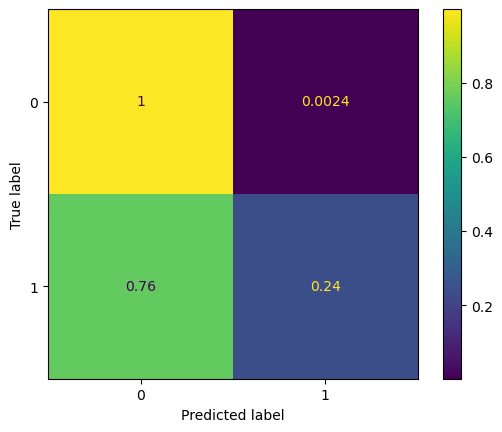

In [218]:
pred_val = cross_val_predict(forest,X_train,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  forest.classes_)
disp.plot()

#### Feature selection

In [48]:
feature_names = X_train.columns
# feature_importance_df = pd.DataFrame([])
# feature_importance_df.sort_values(by=0,axis=1,ascending=False,inplace=True)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': forest.feature_importances_})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# feature_importance_df
# feature_names

    Feature  Importance
0         0    0.058511
2         2    0.054015
3         3    0.053848
1         1    0.053726
5         5    0.046115
..      ...         ...
434     426    0.000000
474     466    0.000000
44       36    0.000000
293     285    0.000000
107      99    0.000000

[512 rows x 2 columns]


In [49]:
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [50]:
X_train_selected
# X_test_selected

,0,0,2,2,3,3,1,1,5,5,...,303,6,6,273,276,263,294,13,271,150
0,0.693689,0.0,0.699128,0.000000,-0.465550,0.0,1.357437,1.0,0.054814,0.0,...,0.0,0.357548,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0
1,1.197744,0.0,0.213100,0.000000,-1.583269,0.0,-0.486697,0.0,-0.200993,0.0,...,0.0,0.357548,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,-0.117908,0.0,-0.758954,1.000000,-0.465550,0.0,-0.263300,0.0,-0.712606,0.0,...,0.0,-0.687534,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0
3,0.238298,0.0,-0.596945,0.000000,-1.583269,0.0,1.201125,0.0,-0.200993,0.0,...,0.0,0.357548,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.0
4,0.331208,0.0,-0.920963,0.000000,0.093310,0.0,-0.911293,0.0,-1.224220,0.0,...,0.0,-1.314583,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,-0.051955,0.0,1.378771,1.000000,6.186252,0.0,-0.145222,0.0,2.357076,0.0,...,0.0,2.447711,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0
7239,-1.928853,0.0,0.418167,0.000000,-0.167554,0.0,-1.374660,0.0,0.037817,0.0,...,0.0,0.357548,0.000000,1.000000,0.933556,1.000000,0.0,0.000000,0.000000,0.0
7240,0.692811,0.0,-1.255988,0.533967,-0.465550,0.0,0.627659,0.0,-1.360812,0.0,...,0.0,-0.910750,0.466033,1.000000,1.000000,1.000000,0.0,0.533967,0.000000,0.0
7241,0.454702,0.0,1.718054,0.000000,1.690454,0.0,1.383878,1.0,-0.164633,0.0,...,0.0,0.209003,0.000000,0.857863,0.000000,0.857863,0.0,0.000000,0.142137,0.0


#### Featured model

In [51]:
feat_forest = RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
feat_forest.fit(X_train_selected,Y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

##### Test d'accuary et matrice de confusion

Test de validation

In [52]:
pred = cross_val_score(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)
pred.mean()

0.9845397282942322

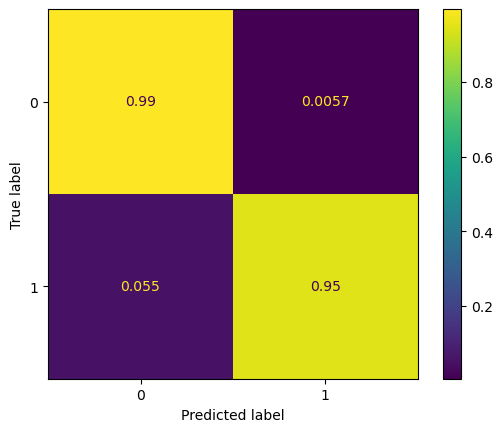

In [53]:
pred_val = cross_val_predict(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

In [190]:
# print(X_train_selected.shape)
# print(Y_train.shape)

#### SMOTE

In [191]:
sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.25)
# sm = SMOTE(random_state=42, n_jobs=-1)
X_smote, Y_smote = sm.fit_resample(X_train_selected, Y_train)

c:\Users\Alexandre\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [192]:
smoted_model = RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
smoted_model.fit(X_smote,Y_smote)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

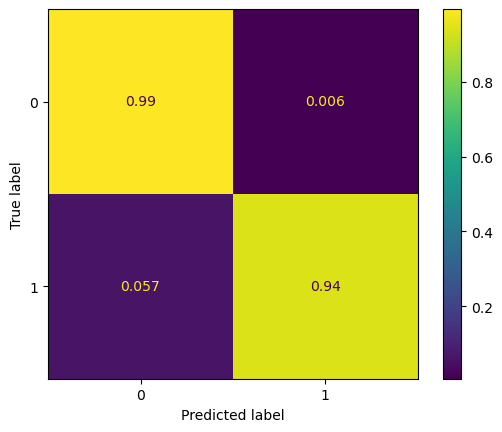

In [193]:
pred_val = cross_val_predict(feat_forest,X_smote,Y_smote,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_smote, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  smoted_model.classes_)
disp.plot()

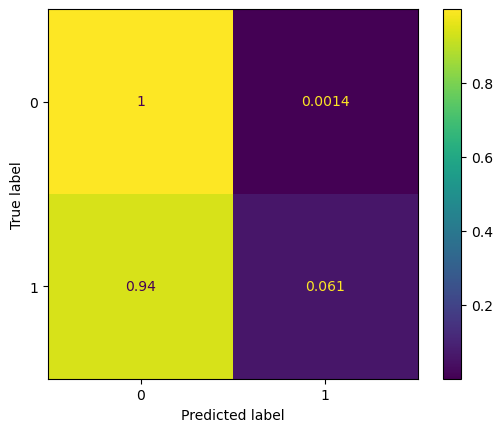

In [194]:
pred_val = cross_val_predict(feat_forest,X_test,Y_test,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  smoted_model.classes_)
disp.plot()
# plt.show()